# Анализ поведения пользователей в мобильном приложении "Ненужные вещи"

**Заказчик исследования**

Котова А.А. - Product Manager 

**Презентация**

[Ccылка на презентацию](https://docs.google.com/presentation/d/1n2Hehc_D5iyP5Tt8MN5db-zrYbMK7zGbXyEc9F7MWM8/edit?usp=sharing)

## Цели исследования

1. Анализ поведения пользователей.
2. Определение сценариев использования приложения.
3. Предоставление рекомендаций по увеличению вовлеченности пользователей.

## Задачи исследования

1. Общий исследовательский анализ данных:
- определить временной интервал предоставленных данных;
- определить количество дней в логе;
- рассчитать общее количество событий в каждую из дат;
- отобразить распределение событий по дням недели;
- рассчитать количество уникальных пользователей в логе;
- отобразить распределение пользователей по источникам установки приложения;
- отобразить распределение пользователей по событиям;
- рассчитать коэффициент удержания (retention rate).

2. Целевой анализ данных:
- выделить сессии пользователей;
- ответить на вопросы: 
   - какие события чаще всего встречаются вместе с целевым?
   - часто ли эти события бывают самостоятельными событиями пользователя или они составляют какую-то воронку?
   - за какое время до совершения целевого события совершаются вспомогательные события?

3. Проверка статистических гипотез:
- Одни пользователи совершают действие **увидел рекомендованные объявления** (tips_show) и **кликнул по рекомендованным объявлениям**(tips_click), другие — только tips_show. Проверьте гипотезу: конверсия в просмотры контактов различается у этих двух групп.

- Среднее время от события **добавил объявление в избранное** (favorites_add) до целевого события отличается от среднего времени от **разные действия, связанные с поиском по сайту** (search_1—search_7) до целевого события.

## Данные

Датасеты содержат данные о событиях, совершенных в мобильном приложении "Ненужные вещи":
- mobile_dataset.csv
- mobile_sources.csv

Путь к датасетам:
- ссылка 1
- ссылка 2

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Данные в датасете в mobile_sources.csv: 

- `userId` — идентификатор пользователя
- `source` — источник, с которого пользователь установил приложение

Данные в датасете mobile_dataset.csv: 

- `event.time` — время совершения
- `user.id` — идентификатор пользователя
- `event.name` — действие пользователя

Виды действий:

- `advert_open` — открыл карточки объявления
- `photos_show` — просмотрел фотографий в объявлении
- `tips_show` — увидел рекомендованные объявления
- `tips_click` — кликнул по рекомендованному объявлению
- `contacts_show` и `show_contacts` — посмотрел номер телефона
- `contacts_call` — позвонил по номеру из объявления
- `map` — открыл карту объявлений
- `search_1`—`search_7` — разные действия, связанные с поиском по сайту
- `favorites_add` — добавил объявление в избранное

## Изучение данных


In [ ]:
#подключаем библиотеки
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import graph_objects as go
import math as mth
import scipy.stats as st

In [ ]:
#читаем данные
mobile_sourсes = pd.read_csv('')
mobile_dataset = pd.read_csv('')

**Первый датасет**

In [ ]:
display(mobile_sourсes.head())

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


**Второй датасет**

In [ ]:
display(mobile_dataset.head())

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


**Изучаем информацию о данных**

**Первый датасет**

In [ ]:
#функция для просмотра информации о датасете
def information(data):
    data.info()
    print(50*'*')
    print('Количество дубликатов в данных:', data.duplicated().sum())
    print(50*'*')
    print('Пропуски в данных:')
    print(data.isna().mean().apply('{:.2%}'.format))

#смотрим информацию по первому датасету
information(mobile_sourсes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB
**************************************************
Количество дубликатов в данных: 0
**************************************************
Пропуски в данных:
userId    0.00%
source    0.00%
dtype: object


In [ ]:
#смотрим какие источники трафика есть в датасете
mobile_sourсes['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

**Второй датасет**

In [ ]:
information(mobile_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
**************************************************
Количество дубликатов в данных: 0
**************************************************
Пропуски в данных:
event.time    0.00%
event.name    0.00%
user.id       0.00%
dtype: object


In [ ]:
#смотрим какие уникальные действия может совершать пользователь и регистрирует приложение
mobile_dataset['event.name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

### Вывод

1. В  датасете об источниках хранится информация о 4293 пользователях.
2. В датасете с данными о событиях хранится ифнормация о 74197 событиях.
3. Пропусков в данных нет.
4. Дубликатов в данных нет.
5. Необходимо поправить названия столбцов для дальнейшего удобства использования.
6. Время совершения события (event.time) имеет тип object. Необходимо поменять на тип datetime.
7. Источники, с которых пользователь установил приложение: 
* other
* yandex
* google
8. search_1—search_7 — разные действия, связанные с поиском по сайту, так как неизвестно, что это за действия, то их можно заменить на единое - 'search'.
9. show_contacts и contacts_show - скорее всего это одно событие по просмотру контактов объявления. Приведем на этапе предобработки к единому виду.


## Предообработка данных

### Объединение датафреймов

In [ ]:
#объединяем датафреймы для удобства дальнейшей работы
data = pd.merge(mobile_dataset, mobile_sourсes, left_on = 'user.id', right_on ='userId', how = 'left').drop('userId', axis=1)
display(data.head())
data.isna().sum()

,event.time,event.name,user.id,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex


event.time    0
event.name    0
user.id       0
source        0
dtype: int64

### Обработка названий столбцов

In [ ]:
data = data.rename(columns = {'event.time':'event_time', 'event.name':'event_name', 'user.id':'user_id'})
data.columns

Index(['event_time', 'event_name', 'user_id', 'source'], dtype='object')

### Обработка типов данных

In [ ]:
data['event_time'] = pd.to_datetime(data['event_time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


### Дополнительная обработка

**Замена всех search1- search7 на search**

In [ ]:
data.loc[(data['event_name'].str.contains('search')), 'event_name'] = 'search'

**Замена show_contacts на contacts_show**

In [ ]:
data.loc[(data['event_name'] == 'show_contacts'), 'event_name'] = 'contacts_show'
data['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search',
       'tips_click', 'photos_show', 'favorites_add', 'contacts_call'],
      dtype=object)

In [ ]:

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
 3   source      74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


### Вывод по предобработке данных

1. Объединили данные в единый датасет **data**. В результате объединения в столбце source не появились нулевые значения. Значит датасеты объединились максимально полно: каждому пользователю, совершающему событие было добавлен источник, с которого он совершал установку.
2. Переименовали столбцы в датасете:
- `event.time` - дата совершения события
- `event_name` - название события
- `user_id`- идентификатор пользователя
- `source` - источник, с которого установили приложение
3. Поменяли тип даты с object на datetime64.
4. Заменили в столбце event_name *search_1—search_7* — разные действия, связанные с поиском по сайту  на *search*.
9. Заменили в столбце event_name действие *contacts_show* на *show_contacts*.

## Общий исследовательский анализ данных

### Временной интервал предоставленных данных


In [ ]:
print(f"Данные предоставлены за период с {data['event_time'].min()} по {data['event_time'].max()}")


Данные предоставлены за период с 2019-10-07 00:00:00.431357 по 2019-11-03 23:58:12.532487


### Количество дней в логе




In [ ]:
print(data['event_time'].max() - data['event_time'].min())

27 days 23:58:12.101130


### Распределение событий (количество) по датам.



In [ ]:
#выделим в отдельный столбец дату события
data['date'] = data['event_time'].dt.date
display(data.head())

,event_time,event_name,user_id,source,date
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07


Среднее количество событий за сутки: 2649.8928571428573


,date,event_name
0,2019-10-07,2545
1,2019-10-08,2499
2,2019-10-09,2027
3,2019-10-10,2243
4,2019-10-11,2030


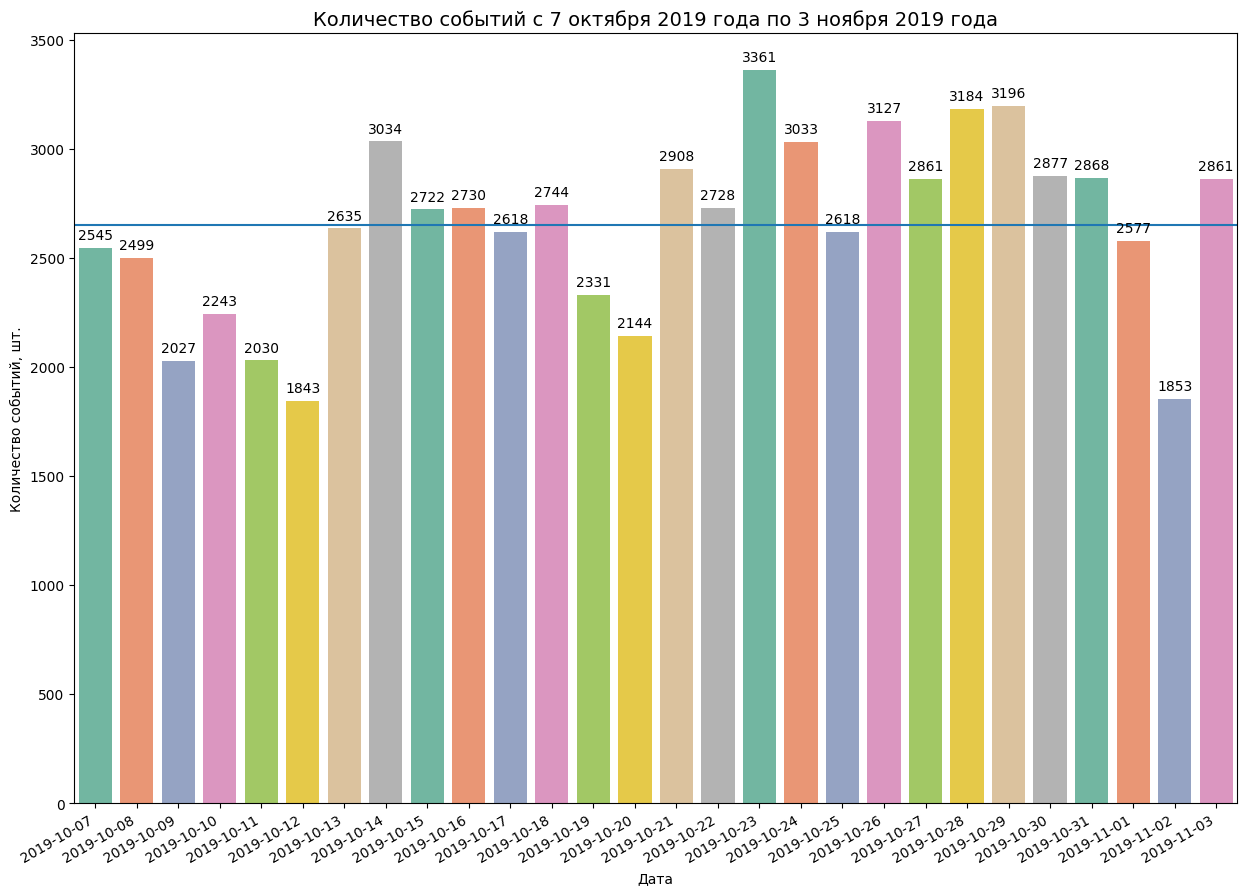

In [ ]:
#cгруппируем события по дате и построим столбчатую диаграмму
mean_event = data.groupby('date')['event_name'].count().mean()
data_event = data.groupby('date')['event_name'].count().reset_index()
print('Среднее количество событий за сутки:', mean_event)
display(data_event.head())
#создаем фигуру и область графика
fig, ax = plt.subplots(figsize=(15,10))
sun = sns.barplot(x = data_event['date'], y = data_event['event_name'], palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title('Количество событий с 7 октября 2019 года по 3 ноября 2019 года', fontsize=14)
ax.set_ylabel('Количество событий, шт.')
ax.set_xlabel('Дата')
ax.axhline(y= mean_event)
#делаем подписи над столбиками
#ax.bar_label(ax.containers[0]) -  в новой версии библиотеки можно использовать
for p in sun.patches:
    sun.annotate('{:d}'.format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

#### Вывод
1. Среднее количество событий в сутки - 2650. 
2. Сильных выбросов по активности пользователей нет. Количество событий колеблется около среднего.
3. Самое большое количество событий произошло 23 октября. Наблюдалась самая высокая активность пользователей.
4. Самая низкая активность наблюдалась 12 октября и 2 ноября. Можно в рамках дополнительного исследования изучить, с чем связаны всплески и провалы активности  в вышеуказанные дни и учесть эти данные при планировании мероприятий по продвижению.


### Распределение событий по дням недели

**Достаем день недели**

In [ ]:
def dow(date):
    days=["Понедельник","Вторник","Среда","Четверг","Пятница","Суббота","Воскресение"]
    return days[date]

In [ ]:
#создадим новый столбец с названием дня недели
data['week_day'] = data['event_time'].dt.weekday
data['week_day_name'] = data['week_day'].apply(dow)
display(data.head())

,event_time,event_name,user_id,source,date,week_day,week_day_name
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,Понедельник
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,Понедельник
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,0,Понедельник
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,Понедельник
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,0,Понедельник


**График активности по дням недели**

,week_day_name,week_day,event_name
2,Понедельник,0,11671
1,Вторник,1,11145
4,Среда,2,10995
6,Четверг,3,10762
3,Пятница,4,9969


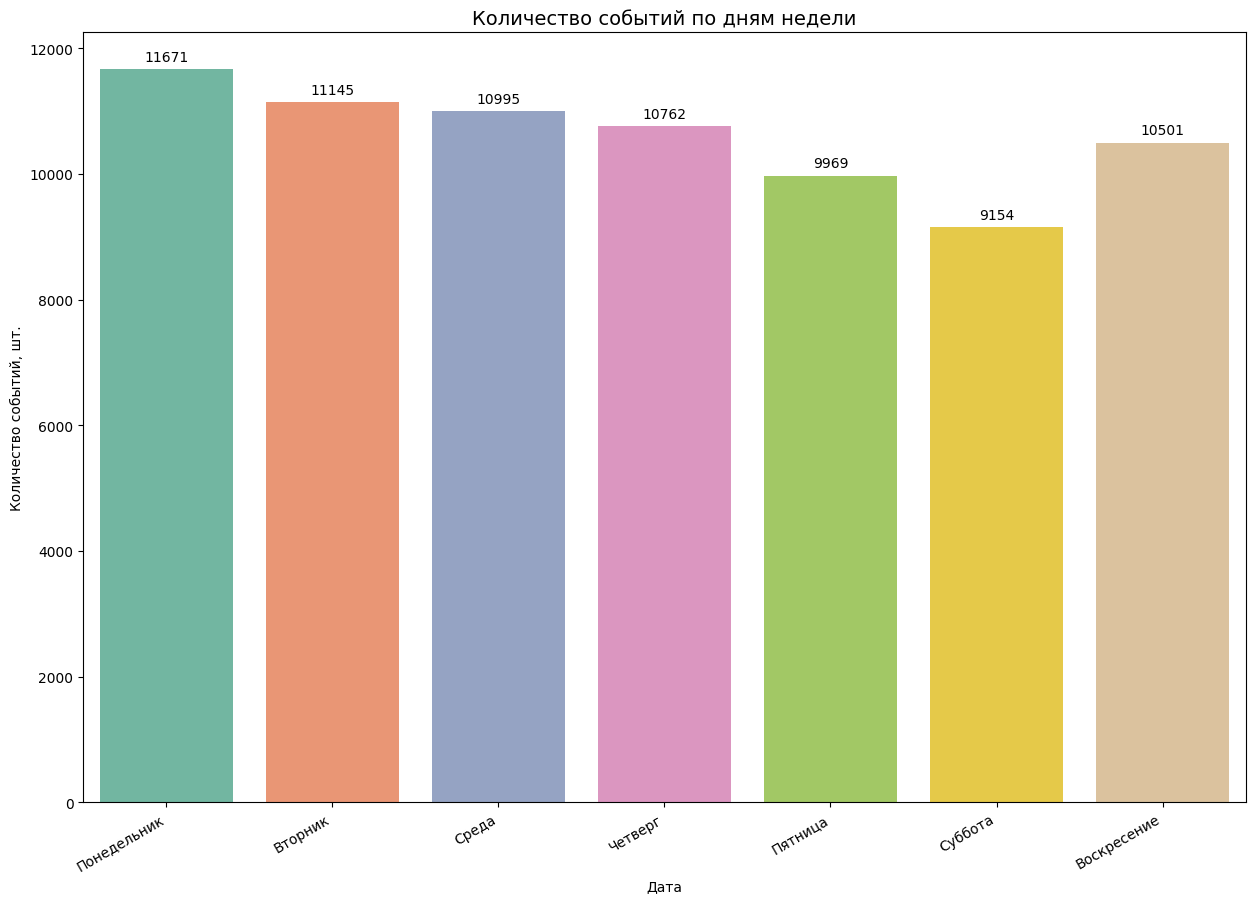

In [ ]:
#cгруппируем события по дате и построим столбчатую диаграмму
data_event_week = data.groupby(['week_day_name', 'week_day'])['event_name'].count().reset_index().sort_values(by = 'week_day')
display(data_event_week.head())
#создаем фигуру и область графика
fig, ax = plt.subplots(figsize=(15,10))
sun_2 = sns.barplot(x = data_event_week['week_day_name'], y = data_event_week['event_name'], palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title('Количество событий по дням недели', fontsize=14)
ax.set_ylabel('Количество событий, шт.')
ax.set_xlabel('Дата')
#делаем подписи над столбиками
#ax.bar_label(ax.containers[0]) -  в новой версии библиотеки можно использовать
for p in sun_2.patches:
    sun_2.annotate('{:d}'.format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

#### Вывод

1. В понедельник самая высокая активность. 
2. Активность пользователей плавно снижается с понедельника (количество событий = 11671) до субботы (количество событий = 9154). В воскресение увеличивается до 10501 события, но не достигает значений понедельника.
3. Ближе к выходным дням пользователи реже заходят в приложение. Это общая тенденция.


### Количество уникальных пользователей, зашедших в приложение с 7 октября 2019 года по 3 ноября 2019 года

In [ ]:
print(f"Количество уникальных пользователей за период с {data['date'].min()} по {data['date'].max()}: {data['user_id'].nunique()} пользователя.")


Количество уникальных пользователей за период с 2019-10-07 по 2019-11-03: 4293 пользователя.


### С каких источников пользователи устанавливают приложения? С каких чаще всего? С каких реже?


In [ ]:
data_source = data.groupby('source')['user_id'].nunique().reset_index().sort_values(by = 'user_id', ascending = False)
display(data_source.head())

,source,user_id
2,yandex,1934
1,other,1230
0,google,1129


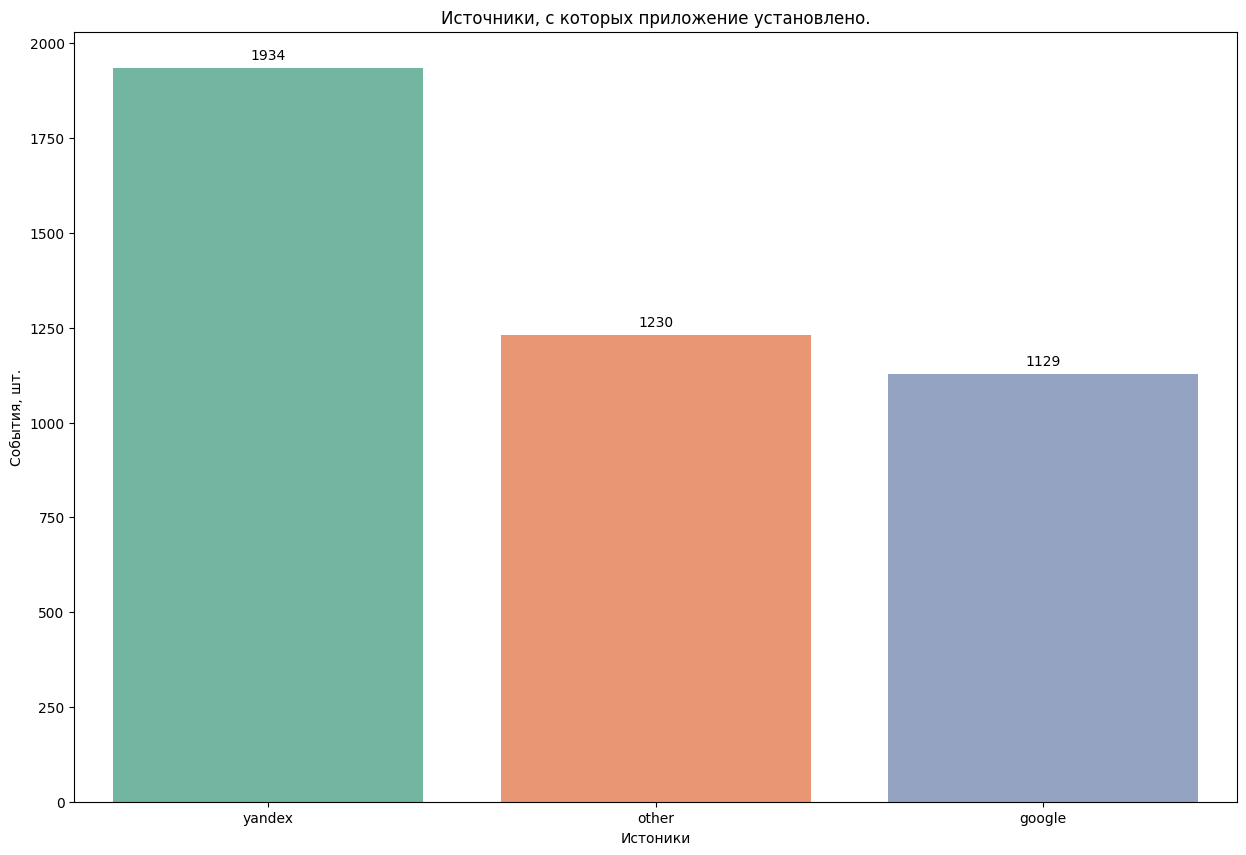

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
source = sns.barplot(x = data_source['source'], y = data_source['user_id'], palette = 'Set2')
ax.set_title('Источники, с которых приложение установлено.')
ax.set_xlabel('Истоники')
ax.set_ylabel('События, шт.')
#делаем подписи над столбиками
#ax.bar_label(ax.containers[0]) -  в новой версии библиотеки можно использовать
for p in source.patches:
    source.annotate('{:d}'.format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

#### Вывод 
1. Чаще всего источником установки является Yandex.
2. Реже Google и другие источники.

###  Какие действия выполняют чаще всего, какие реже?



In [ ]:
data_users = data['event_name'].value_counts()
display(data_users)

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

#### Вывод
1. В топ три самых частых событий входят: Увидел рекомендованные объявления (40055), просмотр фотографий(10012) и поиск (6784). 
2. Все пользователи видят рекомендованные объявления.
2. В топ три самых редких входят: добавление в рекомендованное (1417), клик по рекомендованному (814), звонок через приложение (541).

### Расчет коэффициента удержания пользователей (Retention Rate). Горизонт анализа - 7 дней.



**Добавляем столбец с началом сессии для каждого пользователя**

За начало сессии берем первое событие, которого сделал пользователь из датасета.

In [ ]:
data =  (
    pd.merge(data, data.groupby('user_id')['event_time']
    .min()
    .reset_index()
    .rename(columns = {'event_time':'first_session'}), left_on= 'user_id', right_on = 'user_id', how = 'left')
)   
display(data.head())


,event_time,event_name,user_id,source,date,week_day,week_day_name,first_session
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,Понедельник,2019-10-07 00:00:00.431357
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,Понедельник,2019-10-07 00:00:00.431357
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,0,Понедельник,2019-10-07 00:00:02.245341
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,Понедельник,2019-10-07 00:00:00.431357
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,0,Понедельник,2019-10-07 00:00:02.245341


**Создаем профиль для каждого пользователя**

Профиль пользователя - таблица с деталями первого посещения пользователя.

In [ ]:
profiles_users = data.groupby('user_id').agg({'first_session': 'first', 'source': 'first'}).reset_index()
profiles_users['date'] = profiles_users['first_session'].dt.date
display(profiles_users)

,user_id,first_session,source,date
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,other,2019-10-07
1,00157779-810c-4498-9e05-a1e9e3cedf93,2019-10-19 21:34:33.849769,yandex,2019-10-19
2,00463033-5717-4bf1-91b4-09183923b9df,2019-11-01 13:54:35.385028,yandex,2019-11-01
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,2019-10-18 22:14:05.555052,google,2019-10-18
4,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-25 16:44:41.263364,yandex,2019-10-25
...,...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,2019-10-13 16:11:27.414960,yandex,2019-10-13
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,2019-10-07 20:32:49.997044,yandex,2019-10-07
4290,ffcf50d9-293c-4254-8243-4890b030b238,2019-10-23 11:51:35.199237,google,2019-10-23
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,2019-10-21 16:39:33.867145,yandex,2019-10-21


**Динамика привлечения пользователей по каждому из каналов**

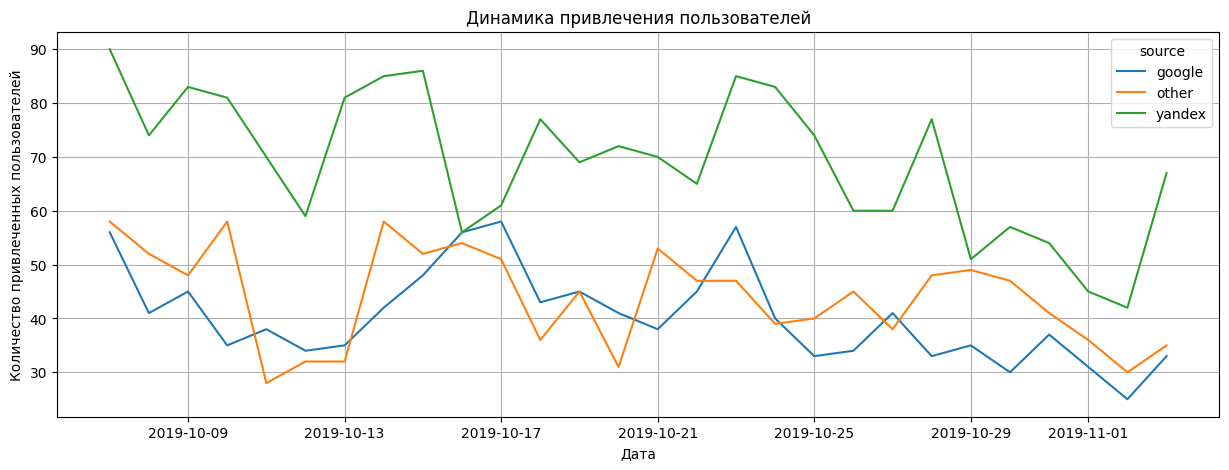

In [ ]:
profiles_users.pivot_table(
    index='date',  # даты первых посещений
    columns='source',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique',  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)
plt.title('Динамика привлечения пользователей')
plt.xlabel('Дата')
plt.ylabel('Количество привлеченных пользователей')

plt.show()

**Проанализируем удержание клиентов за неделю (7 дней)**

Для этого возьмем момент анализа 02.11.2019 года.
Горизонт анализа - 7 дней.

**Добавляем в данные дату первого посещения и лайфтайм пользователя**

In [ ]:
#добавляем дату первого посещения
data['date_first_session'] = data['first_session'].dt.date
#вычисляем лайфтайм для каждой сессии пользователя
data['lifetime'] = (data['event_time'] - data['first_session']).dt.days

display(data.head())

,event_time,event_name,user_id,source,date,week_day,week_day_name,first_session,date_first_session,lifetime
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,Понедельник,2019-10-07 00:00:00.431357,2019-10-07,0
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,Понедельник,2019-10-07 00:00:00.431357,2019-10-07,0
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,0,Понедельник,2019-10-07 00:00:02.245341,2019-10-07,0
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,Понедельник,2019-10-07 00:00:00.431357,2019-10-07,0
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,0,Понедельник,2019-10-07 00:00:02.245341,2019-10-07,0


**Задаем момент анализа и горизонт анализа**

**Удаляем пользователей неуспевших набрать нужный лайфтайм**

In [ ]:
observation_date = datetime(2019, 11, 2).date()
horizon_days = 7

#исключим пользователей неуспевших прожить достотачно дней
last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
data_retention = data.query('date_first_session <= @last_suitable_acquisition_date')

display(data_retention.head())


,event_time,event_name,user_id,source,date,week_day,week_day_name,first_session,date_first_session,lifetime
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,Понедельник,2019-10-07 00:00:00.431357,2019-10-07,0
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,Понедельник,2019-10-07 00:00:00.431357,2019-10-07,0
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,0,Понедельник,2019-10-07 00:00:02.245341,2019-10-07,0
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,2019-10-07,0,Понедельник,2019-10-07 00:00:00.431357,2019-10-07,0
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,2019-10-07,0,Понедельник,2019-10-07 00:00:02.245341,2019-10-07,0


**Абсолютные значения в таблице удержания**

In [ ]:
#строим таблицу удержания
retention_table = data_retention.pivot_table(index = 'date_first_session', columns = 'lifetime', values = 'user_id', aggfunc = 'nunique').fillna(0)
display(retention_table.head())

lifetime,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
date_first_session,,,,,,,,,,,,,,,,,,,,,
2019-10-07,204.0,25.0,20.0,22.0,11.0,8.0,12.0,16.0,11.0,10.0,...,4.0,9.0,5.0,3.0,4.0,7.0,7.0,8.0,9.0,6.0
2019-10-08,167.0,27.0,21.0,9.0,7.0,11.0,9.0,12.0,10.0,7.0,...,5.0,3.0,8.0,6.0,3.0,4.0,7.0,5.0,4.0,2.0
2019-10-09,176.0,13.0,11.0,10.0,12.0,12.0,10.0,13.0,11.0,6.0,...,3.0,2.0,5.0,2.0,6.0,2.0,1.0,4.0,3.0,0.0
2019-10-10,174.0,16.0,18.0,14.0,17.0,14.0,12.0,9.0,14.0,6.0,...,11.0,6.0,5.0,3.0,7.0,3.0,2.0,2.0,0.0,0.0
2019-10-11,136.0,12.0,16.0,13.0,12.0,10.0,10.0,6.0,2.0,6.0,...,8.0,4.0,3.0,3.0,4.0,4.0,2.0,0.0,0.0,0.0


**Считаем относительные значения (относительного 0 лайтайма) и удаляем лайфтайм больше 7**

In [ ]:
# делим данные таблицы удержания на количество пользователей на первый лайфтайм, чтобы получить коэффициент удержания.
retention_table = retention_table.div(retention_table[0], axis=0)

# исключаем из результата все лайфтаймы, превышающие горизонт анализа
retention_table = retention_table.loc[:, 0:horizon_days -1]

display(retention_table)

lifetime,0,1,2,3,4,5,6
date_first_session,,,,,,,
2019-10-07,1.0,0.122549,0.098039,0.107843,0.053922,0.039216,0.058824
2019-10-08,1.0,0.161677,0.125749,0.053892,0.041916,0.065868,0.053892
2019-10-09,1.0,0.073864,0.062500,0.056818,0.068182,0.068182,0.056818
2019-10-10,1.0,0.091954,0.103448,0.080460,0.097701,0.080460,0.068966
2019-10-11,1.0,0.088235,0.117647,0.095588,0.088235,0.073529,0.073529
2019-10-12,1.0,0.128000,0.160000,0.056000,0.064000,0.088000,0.080000
2019-10-13,1.0,0.128378,0.067568,0.054054,0.067568,0.054054,0.054054
2019-10-14,1.0,0.113514,0.102703,0.102703,0.081081,0.070270,0.054054
2019-10-15,1.0,0.139785,0.091398,0.080645,0.053763,0.053763,0.080645


**Тепловая карта удержания**

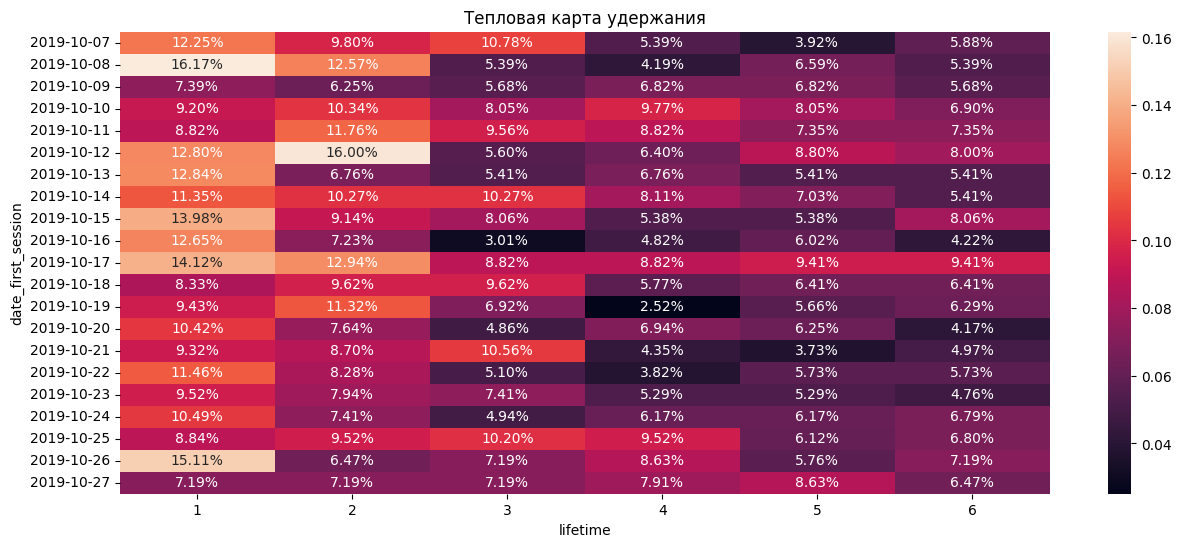

In [ ]:
plt.figure(figsize = (15, 6))  # задаём размер графика
sns.heatmap(retention_table.drop(columns = [0]), annot = True, fmt = '.2%')
plt.title('Тепловая карта удержания')  # название графика
plt.show()

#### Вывод
1. Самое хорошее удержание на первый день показывают когорты от 8 октября, 17 октября и 26 октября.
2. К последнему дню самое лучшее удержание показали когорты 12, 15,17  октября.
3. Стабильно хорошее удержание во все дни показывает когорта от 17 октября. Немного хуже когорта от 12 октября.
4. В целом к последнему дню все когорты показывают от 4 до 9 процентов пользователей от первого дня
5. Доля удержанных пользователей не всегда падает день ко дню. Есть пользователи, которые не выполняли действия на второй день, но вернулись  на третий. 
6. Когорта от 21 октября плохо удерживается.

**График удержания клиентов по дням привлечения**

Так как графиков много посмотрим только когорты от 12, 15, 17, 21, 26 октября

lifetime,1,2,3,4,5,6
date_first_session,,,,,,
2019-10-12,0.128000,0.160000,0.056000,0.064000,0.088000,0.080000
2019-10-15,0.139785,0.091398,0.080645,0.053763,0.053763,0.080645
2019-10-17,0.141176,0.129412,0.088235,0.088235,0.094118,0.094118
2019-10-21,0.093168,0.086957,0.105590,0.043478,0.037267,0.049689
2019-10-26,0.151079,0.064748,0.071942,0.086331,0.057554,0.071942


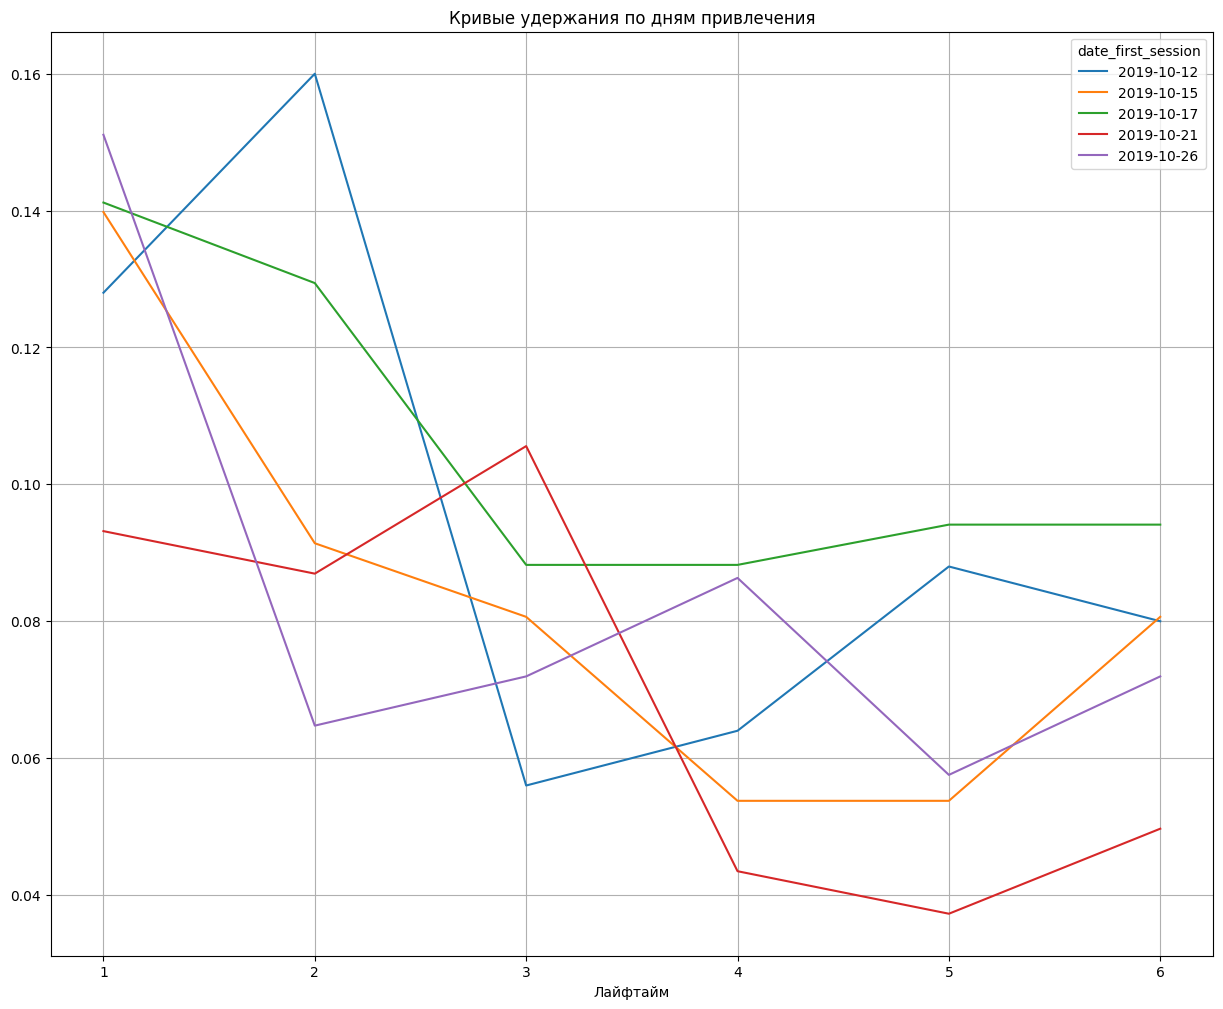

In [ ]:
# строим кривые удержания
report = retention_table.drop(columns = [0]).iloc[[5, 8, 10, 14, 19]]

display(report)

report.T.plot( 
         
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 12),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.show()

#### Вывод
1. График удержания подтверждает ранее сделанные выводы по тепловой карте.
2. Лучше всего удерживается когорта от 17 октября.
3. Хуже всего удерживается когорта от 21 октября.
4. В когорте от 12 октября резко падает удержание на третий день.


### Вывод по общему анализу данных

1. Данные предоставлены за период с 7 октября 2019 года по 3 ноября 2019 года включительно.
2. В логе информация за 28 дней.
3. Среднее количество событий в сутки - 2650. 
3. Количество уникальных пользователей за период с 2019-10-07 по 2019-11-03: 4293 пользователя.
4. Сильных выбросов по активности пользователей нет. Количество событий колеблется около среднего.
5. Самое большое количество событий произошло 23 октября. Наблюдалась самая высокая активность пользователей.
6. Самая низкая активность наблюдалась 12 октября и 2 ноября. Можно в рамках дополнительного исследования изучить, с чем связаны всплески и провалы активности  в вышеуказанные дни и учесть эти данные при планировании мероприятий продвижения.

7. В понедельник самая высокая активность. 
8. Активность пользователей плавно снижается с понедельника (количество событий = 11671) по субботу (количество событий = 9154). В воскресение увеличивается до 10501 события, но не достигает значений понедельника.
9. Ближе к выходным дням пользователи занимаются реже заходят в приложение. 

1. Чаще всего источником установки является Yandex.
2. Реже Google и другие источники.

1. В топ три самых частых событий входят: Увидел рекомендованные объявления (40055), просмотр фотографий(10012) и поиск (6784). 
2. Все пользователи видят рекомендованные объявления.
3. В топ три самых редких входят: добавление в рекомендованное (1417), клик по рекомендованному (814), звонок через приложение (541).

**Когортный анализ**

1. Определили дату первого посещения приложения как дату первого события каждого пользователя.
2. Создали профили пользователей с данными о первом посещении (дата, время, канал скачивания)
3. Из Яндекса стабильно приходит самое большое количество новых пользователей и до 29 октября привлекат не менее 60 клиентов в день, кроме 16 октября, там чуть менее 60. Рекое снижение наблюдается во всех каналах 16 октября. 
4. с 29 октября происходит снижение количества новых клиентов по всем каналам. 
5. После 25 октября самым худшим каналом по привлечению является Google.

6. Самое хорошее удержание на первый день показывают когорты от 8 октября, 17 октября и 26 октября.
7. К последнему дню самое лучшее удержание показали когорты 12,15,17  октября.
8. Стабильно хорошее удержание во все дни показывает когорта от 17 октября. Немного хуже когорта от 12 октября.
9. В целом к последнему дню все когорты показывают от 4 до 9 процентов пользователей от первого дня
10. Доля удержанных пользователей не всегда падает день ко дню. Есть пользователи, которые не выполняли действия на второй день, но вернулись  на третий. 
11. Когорта от 21 октября плохо удерживается.
12. В когорте от 12 октября резко падает удержание на третий день.






## Исследование в рамках поставленных задач





### Выделяем сессии пользователей. 

Добавляем отдельный столбец с номером сессии.
Разбиваем на сессии исходя из того, что в рамках одной сессии не должно быть промежутка более 30 минут. Промежуток примерный и в рамках дополнительного исследования можно поэкпериментировать с ним.

In [ ]:
data = data.sort_values(by = 'event_time')
g = (data.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()
data['session_id'] = data.groupby(['user_id', g], sort=False).ngroup() + 1


### Какие события чаще всего встречаются вместе с целевым?

Группируем по номеру сессии данные. Для каждой сессии считаем количество событий определенного вида. Делаем вывод, каких событий больше встречается совместо с целевым.

In [ ]:

#Группируем данные по номеру сессии
data_sessions_number = (
    data.groupby(['session_id','event_name'])
    .agg({'event_time':'first', 'user_id': 'count'})
    .reset_index()
    .rename(columns = {'user_id':'count_event', 'event_time':'first_time_in_sessions'})
)
display(data_sessions_number.head())

,session_id,event_name,first_time_in_sessions,count_event
0,1,advert_open,2019-10-07 00:00:00.431357,10
1,1,map,2019-10-07 00:04:11.679827,3
2,1,tips_show,2019-10-07 00:00:01.236320,15
3,2,advert_open,2019-10-07 00:00:56.319813,10
4,2,tips_click,2019-10-07 00:41:18.224554,1


In [ ]:
#Отбираем только номера сессий c просмотром контактов
un_sessions = (data_sessions_number.query('event_name == "contacts_show"'))['session_id'].unique()
display(un_sessions)

array([    3,    12,    23, ..., 26826, 26828, 26831])

In [ ]:
#Отбираем из сводной таблицы только все данные по сессиям, содержащим просмотр контактов
#создаем пустой датафрейм
data_pivot = pd.DataFrame()
#перебираем циклом уникальные значения сессий, содержащих просмотр контактов
for i in un_sessions:
  data_sessions_contact_show = data_sessions_number.query('session_id == @i') #отбираем данные по каждой сессии в отдельную таблицу
  data_pivot = data_pivot.append(data_sessions_contact_show) #и соединяем каждую минитаблицу по каждой сессии в единую
    

display(data_pivot.head(10))
#считаем количество событий по каждому действию в рамках сессий с просмотром контакта
print('Количество событий по каждому действию пользователя в рамках сессий с просмотром контактов:')
data_event_count = data_pivot.groupby('event_name')['count_event'].sum().reset_index().sort_values(by = 'count_event', ascending = False)
display(data_event_count)

Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-38-decf271ff080>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_pivot = data_pivot.append(data_sessions_contact_show) #и соединяем каждую минитаблицу по каждой сессии в единую
<ipython-input-38-decf271ff080>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_pivot = data_pivot.append(data_sessions_contact_show) #и соединяем каждую минитаблицу по каждой сессии в единую
<ipython-input-38-decf271ff080>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_pivot = data_pivot.append(data_sessions_contact_show) #и соединяем каждую минитаблицу по каждой сессии в единую
<ipython-input-38-decf271ff080>:7: FutureWarning: The frame.append meth

,session_id,event_name,first_time_in_sessions,count_event
6,3,contacts_show,2019-10-07 00:05:16.003328,2
7,3,tips_click,2019-10-07 00:14:37.801823,2
8,3,tips_show,2019-10-07 00:02:07.374346,15
20,12,contacts_show,2019-10-07 08:11:07.995945,1
21,12,photos_show,2019-10-07 08:02:57.953535,2
22,12,search,2019-10-07 08:10:01.339216,2
41,23,contacts_show,2019-10-07 09:33:19.822541,1
70,38,contacts_show,2019-10-07 10:19:49.080484,1
71,38,tips_show,2019-10-07 10:18:55.701270,4
73,40,contacts_call,2019-10-07 10:29:13.582348,1


Количество событий по каждому действию пользователя в рамках сессий с просмотром контактов:


,event_name,count_event
2,contacts_show,4529
8,tips_show,3323
5,photos_show,657
1,contacts_call,523
6,search,384
0,advert_open,342
4,map,205
3,favorites_add,106
7,tips_click,74


**Столбчатая диаграмма**

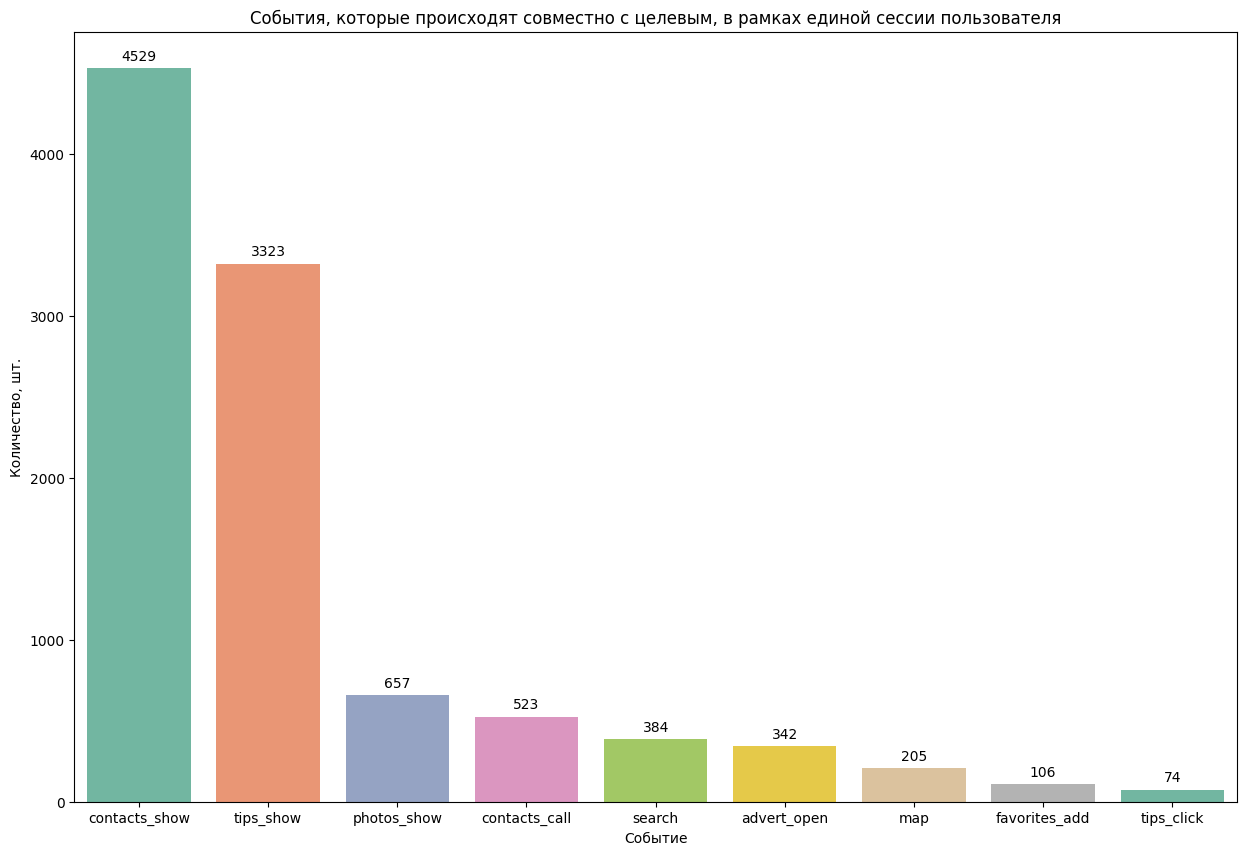

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
event = sns.barplot(x = data_event_count['event_name'], y = data_event_count['count_event'], palette = 'Set2')
ax.set_title('События, которые происходят совместно с целевым, в рамках единой сессии пользователя')
ax.set_xlabel('Событие')
ax.set_ylabel('Количество, шт.')
#делаем подписи над столбиками
#ax.bar_label(ax.containers[0]) -  в новой версии библиотеки можно использовать
for p in event.patches:
    event.annotate('{:d}'.format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

#### Вывод

1. Чаще всего совместно с целевым (просмотр контакта) происходят события:
- увидел рекомендованные объявления (возможно при просмотре объявления пользователи случайно видят рекомендованные объявления, но заказывают по ним редко);
-звонок из приложения (логично, что человек звонит после просмотра контакта);
- просмотр фото;
- поиск объявления.
2. Редко заказывает по рекомендованным объявлениям, так как событие "Кликнул на рекомендованное объявление" совместно с целевым встречается реже всего.
3. События по просмотру карты и добавлению в избранного так же редко приводят к целевому событию. Все же "добавление в избранное" - это более долгая история, скорее всего не в рамках одной сессии. Для исследования, как влияет избранное на просмотр контактов, необходима дополнительная информация по id объявления, чтобы проследить время от добавления объявления в избранное до  просмотра контакта.



### Часто ли эти события бывают самостоятельными событиями пользователя или они составляют какую-то воронку?

Строим воронки до целевого события: сквозную и от предыдущего этапа. 

**Формируем цепочки событий**

Выбираем из действий:

- advert_open — открыл карточки объявления,
- photos_show — просмотрел фотографий в объявлении,
- tips_show — увидел рекомендованные объявления,
- tips_click — кликнул по рекомендованному объявлению,
- contacts_show и show_contacts — посмотрел номер телефона,
- contacts_call — позвонил по номеру из объявления,
- map — открыл карту объявлений,
- search_1—search_7 — разные действия, связанные с поиском по сайту,
- favorites_add — добавил объявление в избранное.

1. 1 цепочка: search - advert_open - photos_show - contacts_show - contacts_call
2. 2 цепочка: tips_show - tips_click - photos_show - contacts_show - contacts_call
3. 3 цепочка: favorites_add - contacts_show - contacts_call




In [ ]:
#задаем цепочки событий
chain_of_events_1 = ['search', 'advert_open', 'photos_show', 'contacts_show', 'contacts_call'] 
chain_of_events_2 = ['tips_show', 'tips_click', 'photos_show', 'contacts_show', 'contacts_call'] 
chain_of_events_3 = ['favorites_add', 'contacts_show', 'contacts_call'] 

**Функция для подсчета сквозной воронки**

In [ ]:
def through_funnel(data, chain_of_events):
  #создаем список с уникальными пользователями, которые совершили "search"
  users_funnel_unique = (data.query('event_name == @chain_of_events[0]'))['user_id'].unique()
  
  #фильтруем данные по этим пользователям и событиям из цепочки событий
  data_event_funnel = data.query('user_id in @users_funnel_unique & event_name in @chain_of_events')
 
  #считаем количество уникальных пользователей для каждого события
  data_event_funnel = data_event_funnel.groupby('event_name')['user_id'].nunique().reset_index()

  #создаем датафрейм, чтобы события шли в правильном порядке, как указано в цепочке
  data_funnel = pd.DataFrame(index = chain_of_events).reset_index()
  
  #объединяем датафрейм с правильным порядком столбцов  с подсчитанными уникальными пользователями по кадому событию
  data_funnel = pd.merge(data_funnel, data_event_funnel, left_on = 'index', right_on ='event_name', how = 'left').drop('index', axis=1)
  fig = go.Figure( go.Funnel(y = data_funnel['event_name'], x = data_funnel['user_id'] ))
  fig.show() 
  return data_funnel




**Строим сквозные воронки для трех цепочек**

In [ ]:
print('Первая воронка: Целевой поиск')
through_funnel(data, chain_of_events_1)

Первая воронка: Целевой поиск


,event_name,user_id
0,search,1666
1,advert_open,339
2,photos_show,647
3,contacts_show,377
4,contacts_call,112


In [ ]:
print('Вторая воронка: Просмотр контактов через рекомендованное')
through_funnel(data, chain_of_events_2)


Вторая воронка: Просмотр контактов через рекомендованное


,event_name,user_id
0,tips_show,2801
1,tips_click,297
2,photos_show,13
3,contacts_show,516
4,contacts_call,1


In [ ]:
print('Третья воронка: Просмотр контактов через избранное')
through_funnel(data, chain_of_events_3)

Третья воронка: Просмотр контактов через избранное


,event_name,user_id
0,favorites_add,351
1,contacts_show,136
2,contacts_call,41


#### Вывод по сквозной воронке

**Первая воронка: целевой поиск**
1. Примерно 20% пользователей переходят от поиска к просмотру объявлению.
2. 28% пользователей от поиска сразу просматривают фотографии.
3. Просматривающих фотографии и контакты больше, чем открывающих карточки объявлений.
4. 22% пользователей просматривают контакты.

**Вторая воронка: просмотр через рекомендованное**
1. Только 10% пользователей кликают на объявления из рекомендованного.
2. 18 % пользователей смотрят контакты.
3. Смотрят контакты чаще, чем кликают на рекомендованное объявление. Значит для просмотра контактов необязательно кликать на объявление.

**Третья воронка: просмотр из избранного**
1. 351 уникальный пользователь добавил за рассмотренный срок объявление в избранное. Из этих пользователей 38% посмотрели контакты. Это больше, чем через целевой поиск продукта.

**Общий вывод**
1. Предположительно, самостоятельными событиями являются: добавление в избранное, просмотр фотографий и открыл карту объявлений - данные этапы необязательны для просмотра контактов.
2. Исходя из анализа воронок событие "Открыл карточки объявления"  так же не является обязательным для просмотра контактов. Оно иногда выпадает из цепочки. Есть пользователи, которые не открывают карточки объявления, а сразу переходят к контактам.
2. Остальные действия складываются в три цепочки: обычный поиск - просмотр контактов и рекомендованное - просмотр контактов, избранное - просмотр контактов.

**Функция для подсчета воронки от предыдущего этапа**

In [ ]:
def funnel_from_previous(data, chain_of_events):
  #копируем датафрейм, чтобы работать с копией
  data1 = data.copy()
  #Создаем пустой датафрейм, куда буду добавлять количество уникальных пользователей на каждом событии.
  users = pd.DataFrame()
  
  #пишем цикл, в котором перебираем каждое событие из цепочки,
  for value in chain_of_events:
    
    #добавляем к пустому датафрейму количеством уникальных пользователей, совершивших  действие
    users[value] = [(data1.query('event_name == @value'))['user_id'].nunique()]
    
    #создаем список с уникальными пользователями, которые совершили  действие
    users_funnel_unique = (data1.query('event_name == @value'))['user_id'].unique()
  
    #фильтруем данные по пользователям, совершившим  действие.
    data1  = data1.query('user_id in @users_funnel_unique')

  users = users.T.reset_index().rename(columns = {'index':'event_name', 0:'count_users'})
  fig = go.Figure( go.Funnel(y = users['event_name'], x = users['count_users'] ))
  fig.show() 
  return(users)



**Строим три воронки от предыдущего шага**

In [ ]:
print('Первая воронка: Целевой поиск')
funnel_from_previous(data, chain_of_events_1)

Первая воронка: Целевой поиск


,event_name,count_users
0,search,1666
1,advert_open,339
2,photos_show,50
3,contacts_show,25
4,contacts_call,14


In [ ]:
print('Вторая воронка: Просмотр контактов через рекомендованное')
funnel_from_previous(data, chain_of_events_2)

Вторая воронка: Просмотр контактов через рекомендованное


,event_name,count_users
0,tips_show,2801
1,tips_click,297
2,photos_show,4
3,contacts_show,4
4,contacts_call,0


In [ ]:
#убрала tips_click из цепочки
print('Вторая воронка: Просмотр контактов через рекомендованное без tips_click и photo_show ')
chain_of_events_4 = ['tips_show', 'contacts_show', 'contacts_call'] 
funnel_from_previous(data, chain_of_events_4)

Вторая воронка: Просмотр контактов через рекомендованное без tips_click и photo_show 


,event_name,count_users
0,tips_show,2801
1,contacts_show,516
2,contacts_call,1


In [ ]:
print('Третья воронка: Просмотр контактов через избранное')
funnel_from_previous(data, chain_of_events_3)

Третья воронка: Просмотр контактов через избранное


,event_name,count_users
0,favorites_add,351
1,contacts_show,136
2,contacts_call,41


#### Вывод по воронке от предыдущего шага

1. При целевом поиске до просмотра контакта доходит только 1,5% пользователей. Конверсия резко падает от открытия объявления к просмотру фото.
2. При просмотре контактов через рекоменованное до просмотра контактов доходит только 0,1% при наличии в цепочке событий "клика по объявлению" и "просмотра фото". То есть смотрят контакты через клик очень мало. Это подтверждает что действия по клику и просмотру фото необязательные для просмотра контактов. 18% от тех кто видит рекомендованное смотрят контакты без этих действий.
3. Лучше всего картина с избранным. 38% пользователей от пользователей, добавляющих объявление в избранное просматривают контакты.

### За какое время до совершения целевого события совершаются вспомогательные события?

In [ ]:
#все сессии с целевым событием и самым первым временем события из группы
display(data_pivot.head(10))

,session_id,event_name,first_time_in_sessions,count_event
6,3,contacts_show,2019-10-07 00:05:16.003328,2
7,3,tips_click,2019-10-07 00:14:37.801823,2
8,3,tips_show,2019-10-07 00:02:07.374346,15
20,12,contacts_show,2019-10-07 08:11:07.995945,1
21,12,photos_show,2019-10-07 08:02:57.953535,2
22,12,search,2019-10-07 08:10:01.339216,2
41,23,contacts_show,2019-10-07 09:33:19.822541,1
70,38,contacts_show,2019-10-07 10:19:49.080484,1
71,38,tips_show,2019-10-07 10:18:55.701270,4
73,40,contacts_call,2019-10-07 10:29:13.582348,1


Чаще всего совместно с целевым (просмотр контакта) происходят события:
- увидел рекомендованные объявления
- просмотр фото
- поиск объявления

In [ ]:
#сохраним события в список 
frequent_events = data['event_name'].unique()

#отфильтруем по этим событиям сессии с целевым
data_sessions_frequent_events = data_pivot.query('event_name in @frequent_events')

display(data_sessions_frequent_events.head())

,session_id,event_name,first_time_in_sessions,count_event
6,3,contacts_show,2019-10-07 00:05:16.003328,2
7,3,tips_click,2019-10-07 00:14:37.801823,2
8,3,tips_show,2019-10-07 00:02:07.374346,15
20,12,contacts_show,2019-10-07 08:11:07.995945,1
21,12,photos_show,2019-10-07 08:02:57.953535,2


In [ ]:
#для каждой сессии посчитаем дату первого просмотра контакта
def func(x):
  time_contacts_show =  x.query('event_name == "contacts_show"')['first_time_in_sessions']
  return time_contacts_show

data_first_contact = data_sessions_frequent_events.groupby('session_id').apply(func).reset_index().drop('level_1', axis=1).rename(columns = {'first_time_in_sessions':'first_contact_show'})
display(data_first_contact.head())

,session_id,first_contact_show
0,3,2019-10-07 00:05:16.003328
1,12,2019-10-07 08:11:07.995945
2,23,2019-10-07 09:33:19.822541
3,38,2019-10-07 10:19:49.080484
4,40,2019-10-07 10:22:52.431529


In [ ]:
#Объединим таблицы 
data_pivot_delta = pd.merge(data_sessions_frequent_events, data_first_contact, left_on = 'session_id', right_on = 'session_id', how = 'left')
display(data_pivot_delta.head())

,session_id,event_name,first_time_in_sessions,count_event,first_contact_show
0,3,contacts_show,2019-10-07 00:05:16.003328,2,2019-10-07 00:05:16.003328
1,3,tips_click,2019-10-07 00:14:37.801823,2,2019-10-07 00:05:16.003328
2,3,tips_show,2019-10-07 00:02:07.374346,15,2019-10-07 00:05:16.003328
3,12,contacts_show,2019-10-07 08:11:07.995945,1,2019-10-07 08:11:07.995945
4,12,photos_show,2019-10-07 08:02:57.953535,2,2019-10-07 08:11:07.995945


In [ ]:
#добавим столбец с разницей во времени
data_pivot_delta['delta'] = (((data_pivot_delta['first_contact_show'] - data_pivot_delta['first_time_in_sessions']).abs().dt.seconds)/60).round(2)
display(data_pivot_delta.head())

,session_id,event_name,first_time_in_sessions,count_event,first_contact_show,delta
0,3,contacts_show,2019-10-07 00:05:16.003328,2,2019-10-07 00:05:16.003328,0.00
1,3,tips_click,2019-10-07 00:14:37.801823,2,2019-10-07 00:05:16.003328,9.35
2,3,tips_show,2019-10-07 00:02:07.374346,15,2019-10-07 00:05:16.003328,3.13
3,12,contacts_show,2019-10-07 08:11:07.995945,1,2019-10-07 08:11:07.995945,0.00
4,12,photos_show,2019-10-07 08:02:57.953535,2,2019-10-07 08:11:07.995945,8.17


In [ ]:
#посчитаем среднее время от вспомогательных событий до целевого
data_pivot_delta_avg = data_pivot_delta.groupby('event_name')['delta'].median().sort_values(ascending = False).round(1).reset_index()
display(data_pivot_delta_avg)

,event_name,delta
0,tips_click,2.3
1,map,2.0
2,search,2.0
3,advert_open,1.6
4,photos_show,1.3
5,tips_show,1.1
6,favorites_add,1.0
7,contacts_call,0.1
8,contacts_show,0.0


**Столбчатая диаграмма**

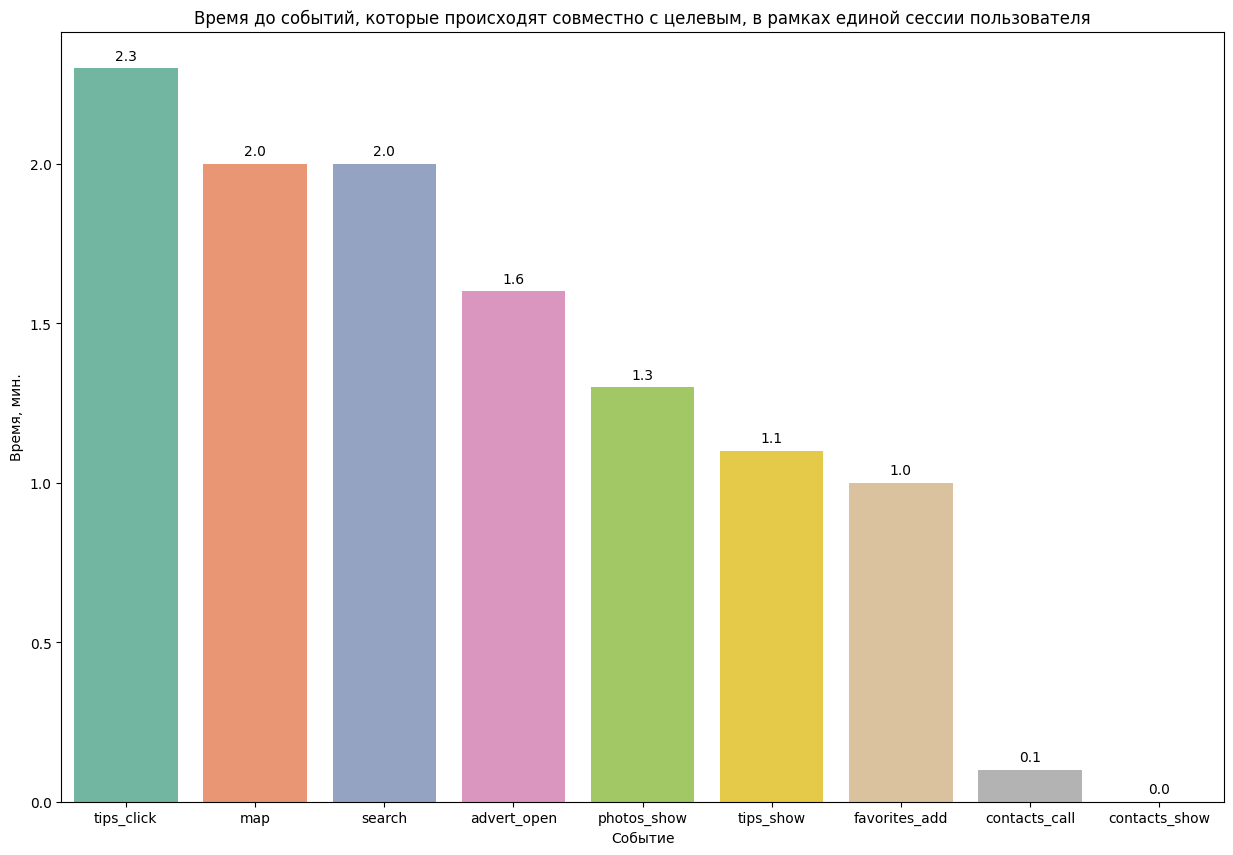

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
time_event = sns.barplot(x = data_pivot_delta_avg['event_name'], y = data_pivot_delta_avg['delta'], palette = 'Set2')
ax.set_title('Время до событий, которые происходят совместно с целевым, в рамках единой сессии пользователя')
ax.set_xlabel('Событие')
ax.set_ylabel('Время, мин.')
#делаем подписи над столбиками
#ax.bar_label(ax.containers[0]) -  в новой версии библиотеки можно использовать
for p in time_event.patches:
    time_event.annotate('{:.1f}'.format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.show()

#### Вывод

1. К концу исследования выяснилось, что время имеет выбросы, поэтому берем для расчетов не среднее время, а медианное.
2. Самое долгое время до целевого действия: От 2 до 2,5 минут до просмотра контактов объявления. Пользователи изучают карту, ищут подходящее объявление и кликают по рекомендованному объявлению - это самое долгое время.

2. Самое быстрое время до целевого действия: От 1 до 1,5 минут до просмотра контактов объявления. Пользователи добавляют объявления в избранное, открывают карточку объявления и смотрят рекомендованное.

## Проверка статистических гипотез

### Гипотеза 1

 Одни пользователи совершают действие **увидел рекомендованные объявления** (tips_show) и **кликнул по рекомендованным объявлениям**(tips_click), другие — только tips_show. 
 
1.  Нулевая гипотеза: Конверсия в просмотры контактов равна у этих двух групп.
2.  Альтернативная гипотеза: Конверсия в просмотры контактов различается у этих двух групп.

**Строим воронки**

In [ ]:
#cоставим цепочку событий
chain_of_events_5 = ['tips_show', 'tips_click', 'contacts_show'] 


#посчитаем воронку от предыдущего шага для первой цепочки
data_funnel_tips_click = funnel_from_previous(data, chain_of_events_5)

#добавим столбец с конверсией
data_funnel_tips_click['conversions'] = (data_funnel_tips_click['count_users']/data_funnel_tips_click.loc[0, 'count_users']).round(2)
display(data_funnel_tips_click)

,event_name,count_users,conversions
0,tips_show,2801,1.00
1,tips_click,297,0.11
2,contacts_show,91,0.03


In [ ]:
#копируем датафрейм, чтобы работать с копией
data2 = data.copy()
#Создаем пустой датафрейм, куда буду добавлять количество уникальных пользователей на каждом событии.
data_funnel_no_tips_click = pd.DataFrame()
  
#пишем цикл, в котором перебираем каждое событие из цепочки,
for value in chain_of_events_5:
    if value == 'tips_click':
        #создаем список с уникальными пользователями, которые совершили tips_click
        users_funnel_unique3 = (data2.query('event_name == "tips_click"'))['user_id'].unique()

        #фильтруем данные по пользователям,  не совершившими tips_click
        data2  = data2.query('user_id not in @users_funnel_unique3')

        #добавляем к пустому датафрейму количество уникальных пользователей, совершивших  действие tips_show
        #и не совершивших tips_click
        data_funnel_no_tips_click[value] = [data2['user_id'].nunique()]
        
    else:    
        #добавляем к пустому датафрейму количеством уникальных пользователей, совершивших  действие
        data_funnel_no_tips_click[value] = [(data2.query('event_name == @value'))['user_id'].nunique()]

        #создаем список с уникальными пользователями, которые совершили  действие
        users_funnel_unique4 = (data2.query('event_name == @value'))['user_id'].unique()

        #фильтруем данные по пользователям, совершившим  действие.
        data2  = data2.query('user_id in @users_funnel_unique4')
        
data_funnel_no_tips_click = data_funnel_no_tips_click.drop('tips_show', axis=1).rename(columns = {'tips_click':'tips_show'})
        
data_funnel_no_tips_click = data_funnel_no_tips_click.T.reset_index().rename(columns = {'index':'event_name', 0:'count_users'})
fig = go.Figure( go.Funnel(y = data_funnel_no_tips_click['event_name'], x = data_funnel_no_tips_click['count_users'] ))
fig.show()


In [ ]:
#добавим столбец с конверсией
data_funnel_no_tips_click['conversions'] = (data_funnel_no_tips_click['count_users']/data_funnel_no_tips_click.loc[0, 'count_users']).round(2)
display(data_funnel_no_tips_click)


,event_name,count_users,conversions
0,tips_show,2504,1.00
1,contacts_show,425,0.17


**Проверяем гипотезу о равенстве долей (конверсии)**

**Функция**

In [ ]:
#Проверяем гипотезу о равенстве долей(конверсии). Нулевая гипотеза - конверсии равны. Альтернативная - конверсии не равны.
def ztest(successes1, trials1, successes2, trials2):
    alpha = 0.05 # критический уровень статистической значимости
    
    print(successes1, trials1, successes2, trials2) # КОД РЕВЬЮЕРА

    # пропорция успехов в группе с tips_click:
    p1 = successes1/trials1
    # пропорция успехов в группе без tips_click:
    p2 = successes2/trials2

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes1 + successes2) / (trials1 + trials2)

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2 
    #Так как распределение статистики
    #нормальное, вызовем метод cdf(). 
    #Саму статистику возьмём по модулю методом abs() — 
    #чтобы получить правильный результат независимо от её знака. Это возможно, потому что тест двусторонний. 

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        ) 

**Вызываем функцию**

In [ ]:
print('Конверсия на шаге: contacts_show (посмотрел контакты в объявлении) от общего числа пользователей в группе:')
ztest(data_funnel_tips_click.loc[2, 'count_users'], data_funnel_tips_click.loc[1, 'count_users'], data_funnel_no_tips_click.loc[1, 'count_users'], data_funnel_no_tips_click.loc[0, 'count_users'])

Конверсия на шаге: contacts_show (посмотрел контакты в объявлении) от общего числа пользователей в группе:
91 297 425 2504
p-значение:  9.218316554537864e-09
Отвергаем нулевую гипотезу: между долями есть значимая разница


#### Вывод

1.  Нулевая гипотеза: конверсия в просмотры контактов равна у этих двух групп.
2.  Альтернативная гипотеза: конверсия в просмотры контактов различается у этих двух групп.
3. В оценке эксперимента мы использовали 5% уровень статистической значимости. 
4. В результате проведения теста выяснилось, что различия в конверсии между группами пользователей, соверших и не совершивших действие "кликнул по рекомендованному объявлению" являются статистически значимыми. Мы  отвергаем нулевую гипотезу. Считаем конверсии разными.
5. Лучшая конверсия на этапе 'tips_show' (увидел рекомендованное) - contacts_show (посмотрел контакты в объявлении)  с и без 'tips_click' наблюдается у пользователей, кликающих на само объявления. 30% (c tips_click) против 17% (без tips_click).


### Гипотеза 2

1.  Нулевая гипотеза: среднее время от события **добавил объявление в избранное** (favorites_add) до целевого события равно времени от **разные действия, связанные с поиском по сайту** (search_1—search_7) до целевого события.
2.  Альтернативная гипотеза: реднее время от события **добавил объявление в избранное** (favorites_add) до целевого события отличается от среднего времени от **разные действия, связанные с поиском по сайту** (search_1—search_7) до целевого события.


**Данные по времени до целевого события**

In [ ]:
display(data_pivot_delta.head())

,session_id,event_name,first_time_in_sessions,count_event,first_contact_show,delta
0,3,contacts_show,2019-10-07 00:05:16.003328,2,2019-10-07 00:05:16.003328,0.00
1,3,tips_click,2019-10-07 00:14:37.801823,2,2019-10-07 00:05:16.003328,9.35
2,3,tips_show,2019-10-07 00:02:07.374346,15,2019-10-07 00:05:16.003328,3.13
3,12,contacts_show,2019-10-07 08:11:07.995945,1,2019-10-07 08:11:07.995945,0.00
4,12,photos_show,2019-10-07 08:02:57.953535,2,2019-10-07 08:11:07.995945,8.17


**Среднее время от вспомогательного события до целевого**

In [ ]:
display(data_pivot_delta_avg.query('event_name in ["favorites_add", "search"]'))

,event_name,delta
2,search,2.0
6,favorites_add,1.0


**Создадим две выборки и посмотрим распределение**

In [ ]:
#создаем выборку с временем от favorites_add  до contacts_show
data_time_favorites_add = data_pivot_delta.query('event_name == "favorites_add"')
display(data_time_favorites_add.head())

,session_id,event_name,first_time_in_sessions,count_event,first_contact_show,delta
37,86,favorites_add,2019-10-07 13:17:22.640534,1,2019-10-07 13:16:19.849742,1.03
118,523,favorites_add,2019-10-08 11:45:56.073034,1,2019-10-08 11:43:56.783360,1.98
122,534,favorites_add,2019-10-08 11:48:57.869727,1,2019-10-08 11:50:11.847410,1.22
126,553,favorites_add,2019-10-08 12:02:41.639853,1,2019-10-08 12:00:13.987040,2.45
139,596,favorites_add,2019-10-08 13:00:43.047139,1,2019-10-08 13:01:41.341903,0.97


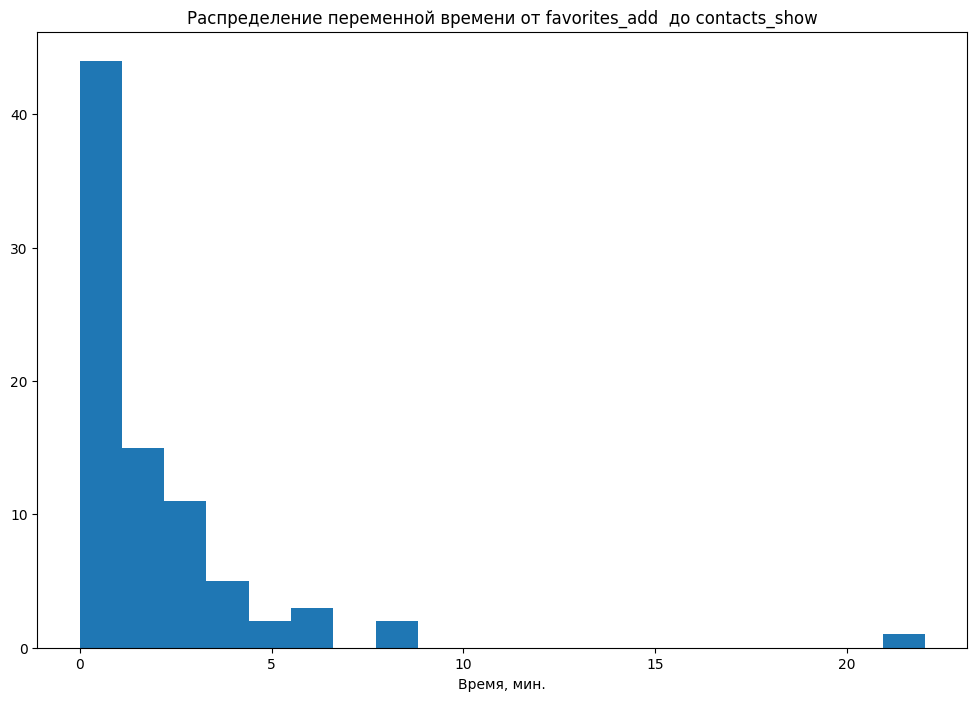

In [ ]:
#строим гистограмму
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(data_time_favorites_add['delta'], bins = 20)
ax.set_title('Распределение переменной времени от favorites_add  до contacts_show')
ax.set_xlabel('Время, мин.')
plt.show()

In [ ]:
#создаем выборку с временем от search  до contacts_show
data_time_search = data_pivot_delta.query('event_name == "search"')
display(data_time_search.head())

,session_id,event_name,first_time_in_sessions,count_event,first_contact_show,delta
5,12,search,2019-10-07 08:10:01.339216,2,2019-10-07 08:11:07.995945,1.10
31,71,search,2019-10-07 12:25:35.879011,1,2019-10-07 12:26:49.082558,1.22
33,72,search,2019-10-07 12:26:57.674221,1,2019-10-07 12:33:00.413587,6.03
60,211,search,2019-10-07 16:59:42.602455,1,2019-10-07 17:08:38.670413,8.93
92,361,search,2019-10-07 21:47:46.776320,1,2019-10-07 21:49:12.309738,1.42


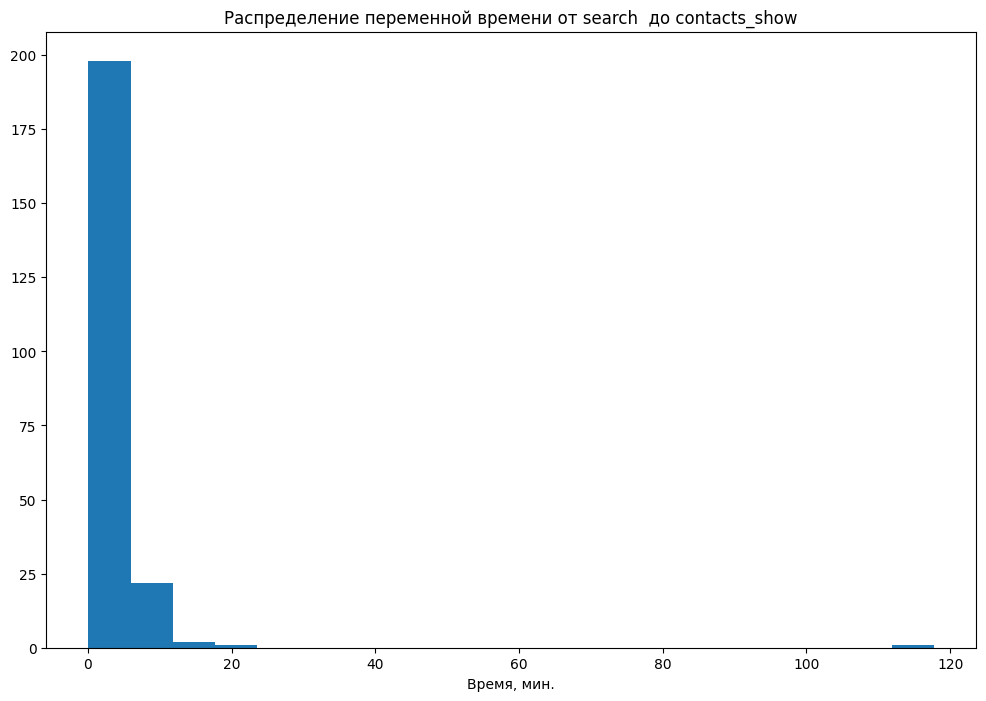

In [ ]:
#строим гистограмму
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(data_time_search['delta'], bins = 20)
ax.set_title('Распределение переменной времени от search  до contacts_show')
ax.set_xlabel('Время, мин.')
plt.show()

**Проводим тест Манна-Уитни**

In [ ]:
alpha = 0.05 # критический уровень статистической значимости

p_value = st.mannwhitneyu(data_time_favorites_add['delta'], data_time_search['delta'])[1]

if p_value < alpha:
  print('Отвергаем нулевую гипотезу: между выборками есть значимая разница')
else:
  print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать выборки разными') 

Отвергаем нулевую гипотезу: между выборками есть значимая разница


#### Вывод

1. Нулевая гипотеза: среднее время от события **добавил объявление в избранное** (favorites_add) до целевого события равно времени от **разные действия, связанные с поиском по сайту** (search_1—search_7) до целевого события.
2.  Альтернативная гипотеза: реднее время от события **добавил объявление в избранное** (favorites_add) до целевого события отличается от среднего времени от **разные действия, связанные с поиском по сайту** (search_1—search_7) до целевого события.
3. Медианное время просмотра контакта из search - 2 минуты, а из favorites_add	1 минута. Пользователи из избранного смотрят контакты быстрее, чем через поиск объявления.
4. Рекомендую провести дополнительное исследование с данными об id объявлений для подсчета времени между добавлением и просмотром контактов, так как на основе предоставленных данных нельзя однозначно сказать, что смотрят контакты в рамках одной сессии с тем, что добавляют в избранное.
5. В данных о времени между событиями есть выбросы, поэтому для проверки гипотезы использовался тест Манна-Уитни, который нечувствителен для выбросов.
6.  В результате проведения теста выяснилось, что различия во времени между событиями 'добавил в избранное' - 'просмотр контактов' и 'поиск объявления' - 'просмотр контактов' являются статистически значимыми. Мы  отвергаем нулевую гипотезу. Действительно из избранного заказывают быстрее.
7. Таким образом, добавление функционала в приложение 'Добавить в избранное' эффективно с точки зрения вовлеченности пользователей.



## Общий вывод

**Предобработка данных**


1. Для анализа были предоставлены два датасета:
- с информацией об источниках установки приложения
- с информацией о совершаемых действиях пользователей
2. Столбцы датасетов переименовали для удобства.
3. Датаcет с информацией об источниках содержит столбцы:
`user_id`- идентификатор пользователя
`source` - источник, с которого установили приложение
4. Датасет с информацией о действих пользователей содержит следующие столбцы:
-`event_time` — время совершения
`user_id` — идентификатор пользователя
`event_name` — действие пользователя
5. Пропусков в данных нет.
6. Дубликатов в данных нет.
7. Объединили данные в единый датасет **data**. 
8. Заменили в столбце `event_name` *search_1—search_7* — разные действия, связанные с поиском по сайту  на *search*.
9. Заменили в столбце `event_name` действие *contacts_show* на *show_contacts*.

**Общий исследовательский анализ данных**

1. В  датасете об источниках хранится информация о 4293 пользователях.
2. В датасете с данными о событиях хранится ифнормация о 74197 событиях, совершенных данными пользователями.
3. Источники, с которых пользователь установил приложение: 
* other
* yandex
* google
4. Среднее количество событий в сутки - 2650. 


*Активность по дате*

1. Самое большое количество событий произошло 23 октября. Наблюдалась самая высокая активность пользователей.
2. Самая низкая активность наблюдалась 12 октября и 2 ноября. 


*Активность по дням недели*

1. В понедельник самая высокая активность. 
2. Активность пользователей плавно снижается с понедельника (количество событий = 11671) до субботы (количество событий = 9154). В воскресение увеличивается до 10501 события, но не достигает значений понедельника.
3. Снижение активности пользвателей к выходным логично, так как люди реже пользуются смартфоном в выходные дни. 

*Источники*

1. Чаще всего источником установки является Yandex.
2. Реже Google и другие источники.

*События*

1. В топ три самых частых событий входят:увидел рекомендованные объявления (40055), просмотр фотографий(10012) и поиск (6784). 
2. Все пользователи видят рекомендованные объявления.
3. В топ три самых редких входят: добавление в рекомендованное (1417), клик по рекомендованному (814), звонок через приложение (541).

**Когортный анализ**

1. Определили дату первого посещения приложения как дату первого события каждого пользователя. На основе этой даты разделили пользователей на когорты.

*Результат:*
1. Из Яндекса стабильно приходит самое большое количество новых пользователей и до 29 октября привлекает не менее 60 клиентов в день, кроме 16 октября, там чуть менее 60. Резкое снижение наблюдается во всех каналах 16 октября. 
2. с 29 октября происходит снижение количества новых клиентов по всем каналам. 
3. После 25 октября самым худшим каналом по привлечению является Google.
4. Самое хорошее удержание на первый день показывают когорты от 8 октября, 17 октября и 26 октября.
5. К последнему дню самое лучшее удержание показали когорты 12,15,17  октября.
6. Стабильно хорошее удержание во все дни показывает когорта от 17 октября. Немного хуже когорта от 12 октября.
7. В целом к последнему дню все когорты показывают от 4 до 9 процентов пользователей от первого дня
8. Доля удержанных пользователей не всегда падает день ко дню. Есть пользователи, которые не выполняли действия на второй день, но вернулись  на третий. 
9. Когорта от 21 октября плохо удерживается.
10. В когорте от 12 октября резко падает удержание на третий день.

**Исследование в рамках поставленной задачи**

*Частота событий совместно с целевым*

1. Чаще всего совместно с целевым (просмотр контакта) происходят события:
- увидел рекомендованные объявления
-звонок из приложения (логично, что человек звонит после просмотра контакта)
- просмотр фото
- поиск объявления
2. Редко заказывают через клик по рекомендованным объявлениям, так как событие "Кликнул на рекомендованное объявление" совместно с целевым встречается реже всего.
3. События по просмотру карты и добавлению в избранного так же редко приводят к целевому событию. Все же "добавление в избранное" - это более долгая история, скорее всего не в рамках одной сессии. Для исследования как влияет избранное на просмотр контактов необходима дополнительная информация по id объявления, чтобы проследить время от добавления объявления в избранное до  просмотра контакта.


*Вывод по сквозной воронке*

Первая воронка: целевой поиск
1. Примерно 20% пользователей переходят от поиска к просмотру объявлению
2. 28% пользователей от поиска сразу просматривают фотографии.
3. Просматривающих фотографии и контакты больше, чем открывающих карточки объявлений.
4. 22% пользователей просматривают контакты.

Вторая воронка: просмотр контактов через рекомендованное
1. Только 10% пользователей кликают на объявления из рекомендованного.
2. 18 % пользователей смотрят контакты.
3. Смотрят контакты чаще, чем кликают на рекомендованное объявление. Значит для просмотра контактов необязательно кликать на объявление.

Третья воронка: просмотр контактов из избранного
1. 351 уникальный пользователь добавил за рассмотренный срок объявление в избранное. Из этих пользователей 38% посмотрели контакты. Это больше, чем через целевой поиск продукта.

*Вывод по воронке от предыдущего шага*

1. При целевом поиске до просмотра контакта доходит только 1,5% пользователей. Конверсия резко падает от открытия объявления к просмотру фото.
2. При просмотре контактов через рекоменованное до просмотра контактов доходит только 0,1% при наличии в цепочке событий "клика по объявлению" и "просмотра фото". То есть смотрят контакты через клик очень мало. Это подтверждает что действия по клику и просмотру фото необязательные для просмотра контактов. 18% от тех кто видит рекомендованное смотрят контакты без этих действий.
3. Лучше всего картина с избранным. 38% пользователей от пользователей, добавляющих объявление в избранное просматривают контакты.

*Общий вывод по воронкам*
1. Предположительно, самостоятельными событиями являются: добавление в избранное, просмотр фотографий и открыл карту объявлений - данные этапы необязательны для просмотра контактов.
2. Исходя из анализа воронок событие "Открыл карточки объявления"  так же не является обязательным для просмотра контактов. Оно иногда выпадает из цепочки. Есть пользователи, которые не открывают карточки объявления, а сразу переходят к контактам.
3. Остальные действия складываются в три цепочки: Обычный поиск - просмотр контактов и рекомендованное - просмотр контактов, избранное - просмотр контактов.

*Время до совершения просмотра контактов**

1. Самое долгое медианное время до совершения просмотра контактов: От 2 до 2,5 минут до просмотра контактов объявления: пользователи изучают карту, ищут подходящее объявление и кликают по рекомендованному объявлению - это самое долгое время.
2. Самое быстрое медианное время до совершения просмотра контактов: От 1 до 1,5 минут до просмотра контактов объявления: пользователи добавляют объявления в избранное, открываю карточку объявления и смотрят рекомендованное.

*Проверка статистических гипотез. Гипотеза 1*

1. Одни пользователи совершают действие **увидел рекомендованные объявления** (tips_show) и **кликнул по рекомендованным объявлениям**(tips_click), другие — только tips_show. 
2.  Нулевая гипотеза: Конверсия в просмотры контактов равна у этих двух групп.
3.  Альтернативная гипотеза: Конверсия в просмотры контактов различается у этих двух групп.
4. В оценке эксперимента мы использовали 5% уровень статистической значимости. 
5. В результате проведения теста выяснилось, что различия в конверсии между группами пользователей, соверших и не совершивших действие "кликнул по рекомендованному объявлению" являются статистически значимыми. Мы  отвергаем нулевую гипотезу. Считаем конверсии разными.
6. Лучшая конверсия на этапе 'tips_show' (увидел рекомендованное) - contacts_show (посмотрел контакты в объявлении)  с и без 'tips_click' наблюдается у пользователей, кликающих на само объявления. 30% (c tips_click) против 17% (без tips_click).

*Проверка статистических гипотез. Гипотеза 2*

1. Нулевая гипотеза: среднее время от события **добавил объявление в избранное** (favorites_add) до целевого события равно времени от **разные действия, связанные с поиском по сайту** (search_1—search_7) до целевого события.
2.  Альтернативная гипотеза: реднее время от события **добавил объявление в избранное** (favorites_add) до целевого события отличается от среднего времени от **разные действия, связанные с поиском по сайту** (search_1—search_7) до целевого события.
3. Медианное время просмотра контакта из search - 2 минуты, а из favorites_add	1 минута. Пользователи из избранного смотрят контакты быстрее, чем через поиск объявления.
4. Рекомендую провести дополнительное исследование с данными об id объявлений для подсчета времени между добавлением и просмотром контактов, так как на основе предоставленных данных нельзя однозначно сказать, что смотрят контакты в рамках одной сессии с тем, что добавляют в избранное.
5. В данных о времени между событиями есть выбросы, поэтому для проверки гипотезы использовался тест Манна-Уитни, который нечувствителен для выбросов.
6.  В результате проведения теста выяснилось, что различия во времени между событиями 'добавил в избранное' - 'просмотр контактов' и 'поиск объявления' - 'просмотр контактов' являются статистически значимыми. Мы  отвергаем нулевую гипотезу. Действительно из избранного заказывают быстрее.
7. Таким образом, добавление функционала в приложение "Добавить в избранное" эффективно с точки зрения вовлеченности пользователей.

### Рекомендации

**Провести дополнительные исследования с целью:**
1. Определить, почему самая большая активность пользователей пришлась на 23 октября и привела ли она к просмотру контактов. Возможно проводились эффективные маркетинговые мероприятия.
2. Определить причины низкой активности (по количеству событий) 12 октября и 2 ноября. 
3. Определить с чем связано самое лучшее удержание на 7 день пользователей, первое посещение которых произошло 12, 15, 17  октября.
4. Определить причины плохого удержания когорты от 21 октября.
5. Определить причины, почему при целевом поиске (когда клиент ищет конкретную вещь) до просмотра контакта доходит только 1,5% пользователей. Конверсия резко падает от открытия объявления к просмотру фото. Возможно неэффективно работает поиск или плохая модерация фото (самих объявлений).


**Рекомендуем:**
1. Убрать возможность просмотра контактов объявления из поиска и рекомендованного. Сделать это возможным только при нажатии на объявление, так как самое быстрое медианное время до совершения просмотра контактов: От 1 до 1,5 минут до просмотра контактов объявления: пользователи добавляют объявления в избранное, открывают карточку объявления и смотрят рекомендованное. При этом найти причины, почему низкая конверсия после просмотра объявления в просмотры контакта. Возможно это неудобно делать из самого объявления.
2. Сделать более доступной и удобной кнопку "Избранное", напоминать пользователям о такой возможности, так как через избранное самая большая конверсия в просмотры контактов и короче время до целевого события, а самих действий по добавлению в избранное очень мало.